In [2]:
from sagas.nlu.trans_helper import process_en_vi, process_en_th
process_en_th('I have two refrigerators', 'hi')

✁ I have two refrigerators(मेरे पास दो रेफ्रिजरेटर हैं ❣ mere paas do rephrijaretar hain)
I(मैं, main) have(है, hai) two(दो, do) refrigerators(रेफ्रिजरेटर, rephrijaretar) .


In [13]:
def get_word_map(source, target, text, ips_idx=0):
    from sagas.nlu.google_translator import translate    
    import time
    
    rs={}
    verbose = False
    options = set(['get_pronounce'])
    for sent in text.split(' '):
        res, t = translate(sent, source=source, target=target,
                           trans_verbose=verbose, options=options)
        # print(res, sent, t[ips_idx])
        rs[sent]='%s\n(%s,%s)' % (sent, res, t.pronounce[ips_idx][1:])
        time.sleep(0.05)
    return rs
get_word_map('hi','en', 'मेरे पास दो रेफ्रिजरेटर')

{'दो': 'दो\n(two, do)',
 'पास': 'पास\n(near, paas)',
 'मेरे': 'मेरे\n(my, mere)',
 'रेफ्रिजरेटर': 'रेफ्रिजरेटर\n(Refrigerators, rephrijaretar)'}

In [9]:
from sagas.nlu.corenlp_helper import CoreNlp, CoreNlpViz, get_nlp
nlp=get_nlp('hi')

text: मेरे 	lemma: मैं	upos: PRON	xpos: PRP
text: पास 	lemma: पास	upos: ADP	xpos: NST
text: दो 	lemma: दो	upos: NUM	xpos: QC
text: रेफ्रिजरेटर 	lemma: रेफ्रिजरेटर	upos: NOUN	xpos: NN
text: हैं 	lemma: है	upos: AUX	xpos: VM
('मेरे', '4', 'nmod')
('पास', '1', 'case')
('दो', '4', 'nummod')
('रेफ्रिजरेटर', '0', 'root')
('हैं', '4', 'cop')


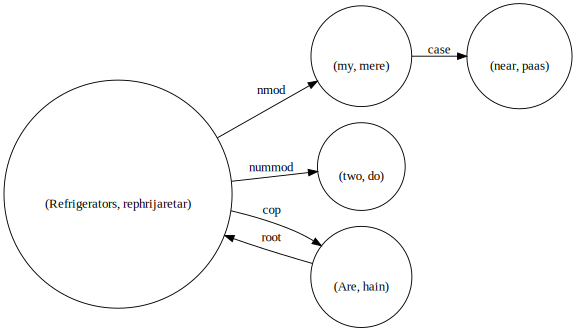

In [14]:
ana=lambda sents: CoreNlpViz().analyse(sents, nlp, get_word_map('hi','en', sents))
ana('मेरे पास दो रेफ्रिजरेटर हैं')

## Hierarchy of typed dependencies
* see: dependencies_manual.pdf

 गाना
text: मैं 	lemma: मैं	upos: PRON	xpos: PRP
text: एक 	lemma: एक	upos: NUM	xpos: QC
text: गाना 	lemma: गाना	upos: NOUN	xpos: NN
text: गाता 	lemma: गा	upos: VERB	xpos: VM
text: हु 	lemma: हु	upos: AUX	xpos: VAUX
('मैं', '4', 'nsubj')
('एक', '3', 'nummod')
('गाना', '4', 'obj')
('गाता', '0', 'root')
('हु', '4', 'aux')


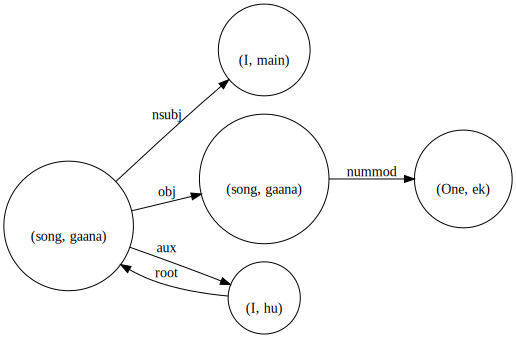

In [16]:
ana('मैं एक गाना गाता हु')

In [1]:
alphabet='''
छी
    छ   cha cha Cha cha
गु
    ग   ga  ga  ga  ga
'''

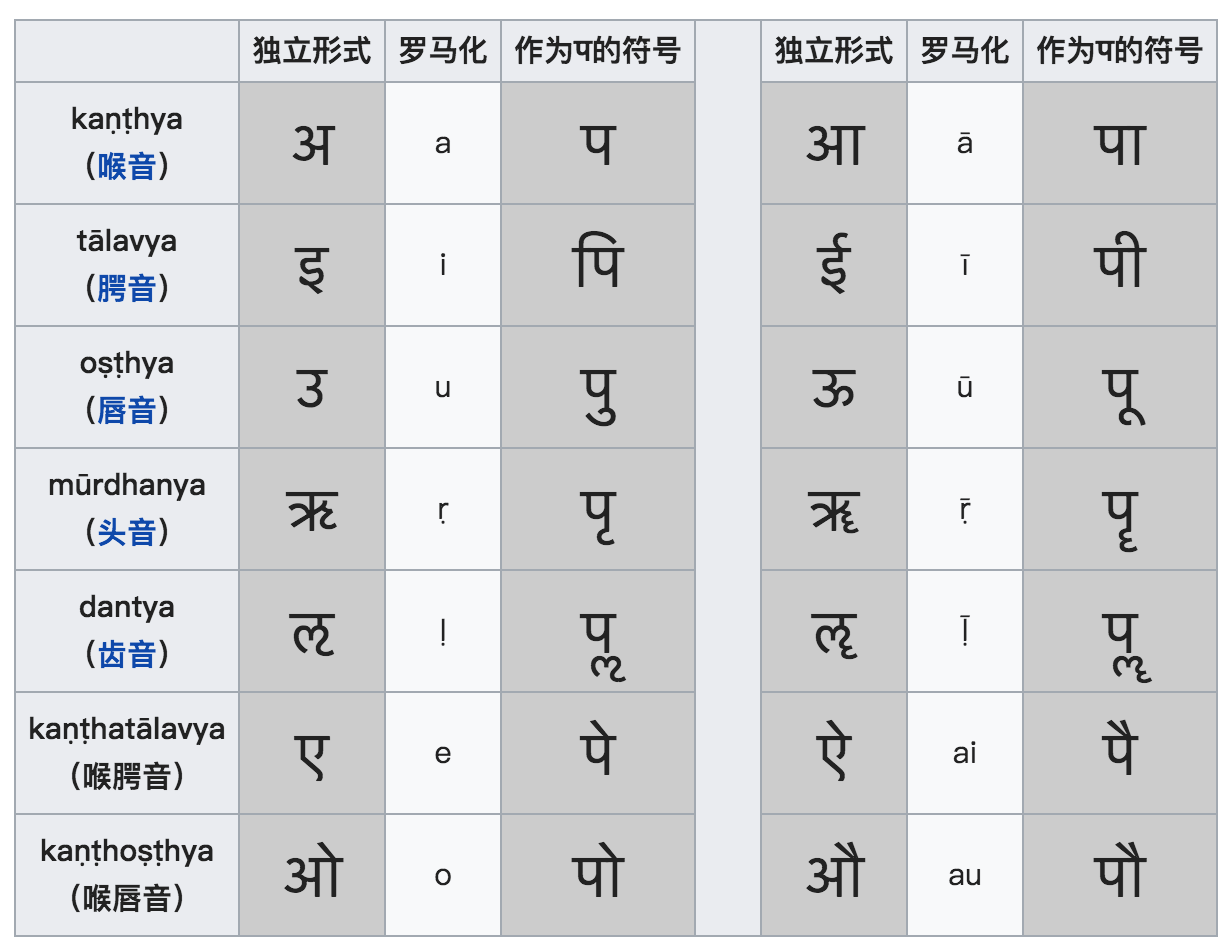

In [8]:
import sagas
vowel='''♤	独立形式	罗马化	作为प的符号	独立形式	罗马化	作为प的符号
kaṇṭhya（喉音）	अ	a	प	आ	ā	पा
tālavya（腭音）	इ	i	पि	ई	ī	पी
oṣṭhya（唇音）	उ	u	पु	ऊ	ū	पू
mūrdhanya（头音）	ऋ	ṛ	पृ	ॠ	ṝ	पॄ
dantya（齿音）	ऌ	ḷ	पॢ	ॡ	ḹ	पॣ
kaṇṭhatālavya（喉腭音）	ए	e	पे	ऐ	ai	पै
kaṇṭhoṣṭhya（喉唇音）	ओ	o	पो	औ	au	पौ'''
clusters=vowel.split('\n')
cols=clusters[0].split('\t')
rs=[]
for c in clusters[1:]:
    rs.append(c.split('\t'))
print(cols)
sagas.to_df(rs, cols)

['♤', '独立形式', '罗马化', '作为प的符号', '独立形式', '罗马化', '作为प的符号']


,♤,独立形式,罗马化,作为प的符号,独立形式,罗马化,作为प的符号
0,kaṇṭhya（喉音）,अ,a,प,आ,ā,पा
1,tālavya（腭音）,इ,i,पि,ई,ī,पी
2,oṣṭhya（唇音）,उ,u,पु,ऊ,ū,पू
3,mūrdhanya（头音）,ऋ,ṛ,पृ,ॠ,ṝ,पॄ
4,dantya（齿音）,ऌ,ḷ,पॢ,ॡ,ḹ,पॣ
5,kaṇṭhatālavya（喉腭音）,ए,e,पे,ऐ,ai,पै
6,kaṇṭhoṣṭhya（喉唇音）,ओ,o,पो,औ,au,पौ


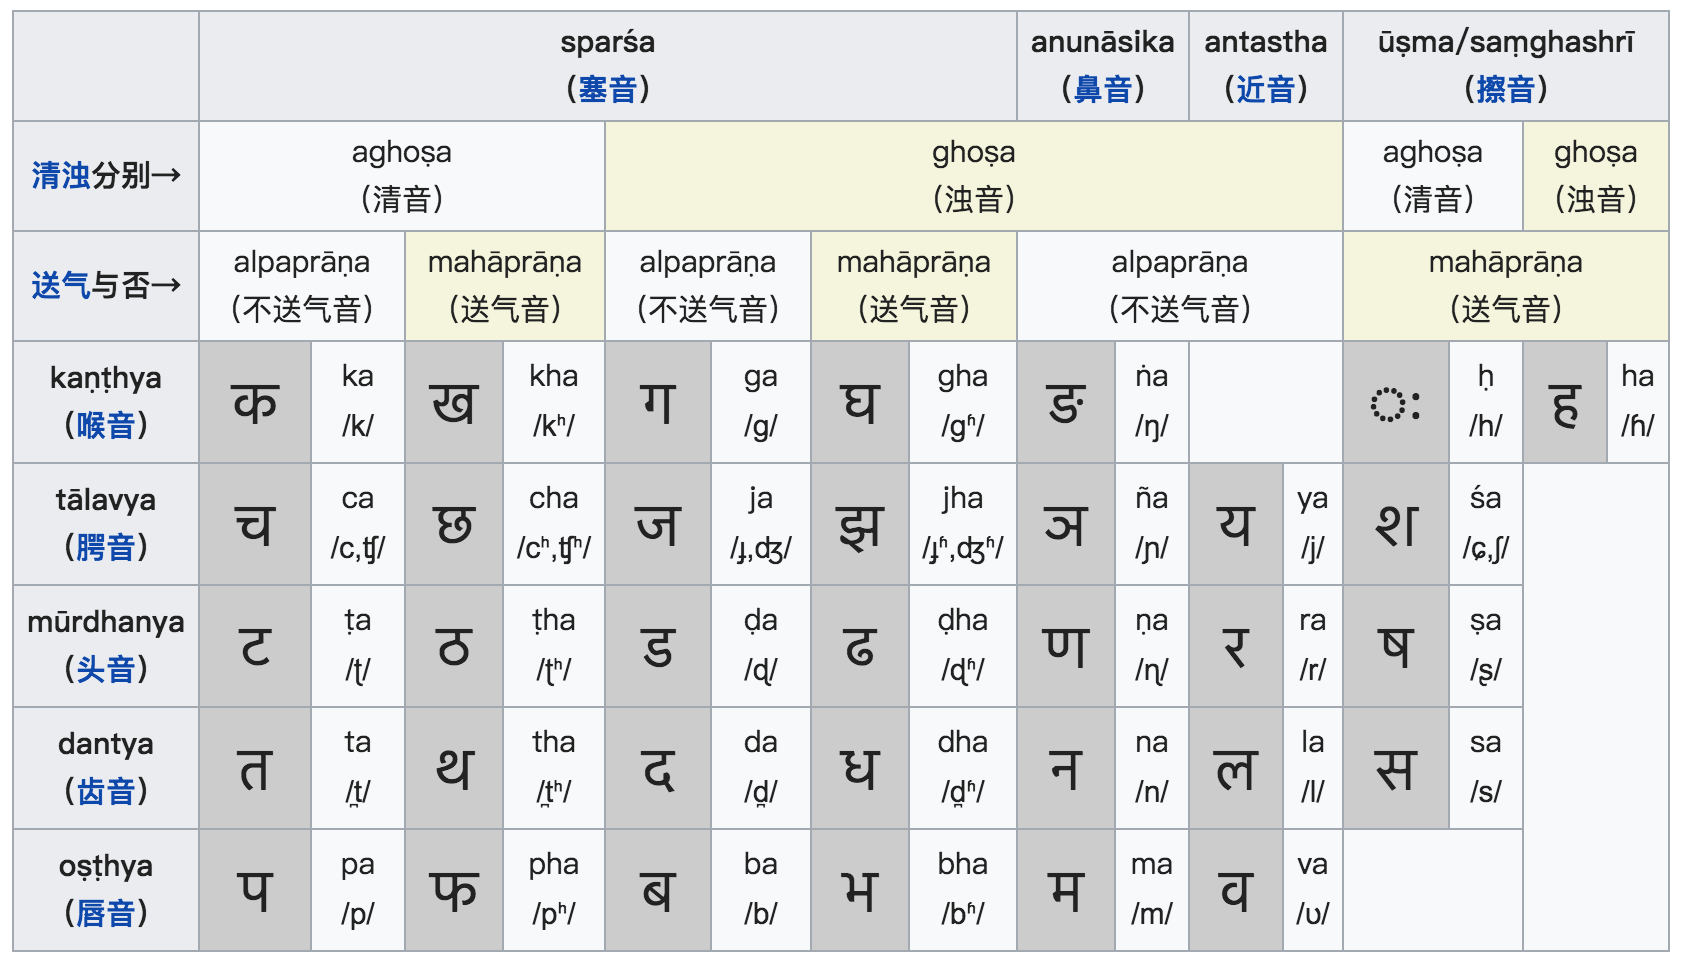

In [5]:
import sagas
Double_consonant_cluster='''♤	क	ख	ग	घ	ङ	च	छ	ज	झ	ञ	ट	ठ	ड	ढ	ण	त	थ	द	ध	न	प	फ	ब	भ	म	य	र	ल	व	श	ष	स	ह	ळ	क्ष	ज्ञ
क	क्क	क्ख	क्ग	क्घ	क्ङ	क्च	क्छ	क्ज	क्झ	क्ञ	क्ट	क्ठ	क्ड	क्ढ	क्ण	क्त	क्थ	क्द	क्ध	क्न	क्प	क्फ	क्ब	क्भ	क्म	क्य	क्र	क्ल	क्व	क्श	क्ष	क्स	क्ह	क्ळ	क्क्ष	क्ज्ञ
ख	ख्क	ख्ख	ख्ग	ख्घ	ख्ङ	ख्च	ख्छ	ख्ज	ख्झ	ख्ञ	ख्ट	ख्ठ	ख्ड	ख्ढ	ख्ण	ख्त	ख्थ	ख्द	ख्ध	ख्न	ख्प	ख्फ	ख्ब	ख्भ	ख्म	ख्य	ख्र	ख्ल	ख्व	ख्श	ख्ष	ख्स	ख्ह	ख्ळ	ख्क्ष	ख्ज्ञ
ग	ग्क	ग्ख	ग्ग	ग्घ	ग्ङ	ग्च	ग्छ	ग्ज	ग्झ	ग्ञ	ग्ट	ग्ठ	ग्ड	ग्ढ	ग्ण	ग्त	ग्थ	ग्द	ग्ध	ग्न	ग्प	ग्फ	ग्ब	ग्भ	ग्म	ग्य	ग्र	ग्ल	ग्व	ग्श	ग्ष	ग्स	ग्ह	ग्ळ	ग्क्ष	ग्ज्ञ
घ	घ्क	घ्ख	घ्ग	घ्घ	घ्ङ	घ्च	घ्छ	घ्ज	घ्झ	घ्ञ	घ्ट	घ्ठ	घ्ड	घ्ढ	घ्ण	घ्त	घ्थ	घ्द	घ्ध	घ्न	घ्प	घ्फ	घ्ब	घ्भ	घ्म	घ्य	घ्र	घ्ल	घ्व	घ्श	घ्ष	घ्स	घ्ह	घ्ळ	घ्क्ष	घ्ज्ञ
ङ	ङ्क	ङ्ख	ङ्ग	ङ्घ	ङ्ङ	ङ्च	ङ्छ	ङ्ज	ङ्झ	ङ्ञ	ङ्ट	ङ्ठ	ङ्ड	ङ्ढ	ङ्ण	ङ्त	ङ्थ	ङ्द	ङ्ध	ङ्न	ङ्प	ङ्फ	ङ्ब	ङ्भ	ङ्म	ङ्य	ङ्र	ङ्ल	ङ्व	ङ्श	ङ्ष	ङ्स	ङ्ह	ङ्ळ	ङ्क्ष	ङ्ज्ञ
च	च्क	च्ख	च्ग	च्घ	च्ङ	च्च	च्छ	च्ज	च्झ	च्ञ	च्ट	च्ठ	च्ड	च्ढ	च्ण	च्त	च्थ	च्द	च्ध	च्न	च्प	च्फ	च्ब	च्भ	च्म	च्य	च्र	च्ल	च्व	च्श	च्ष	च्स	च्ह	च्ळ	च्क्ष	च्ज्ञ
छ	छ्क	छ्ख	छ्ग	छ्घ	छ्ङ	छ्च	छ्छ	छ्ज	छ्झ	छ्ञ	छ्ट	छ्ठ	छ्ड	छ्ढ	छ्ण	छ्त	छ्थ	छ्द	छ्ध	छ्न	छ्प	छ्फ	छ्ब	छ्भ	छ्म	छ्य	छ्र	छ्ल	छ्व	छ्श	छ्ष	छ्स	छ्ह	छ्ळ	छ्क्ष	छ्ज्ञ
ज	ज्क	ज्ख	ज्ग	ज्घ	ज्ङ	ज्च	ज्छ	ज्ज	ज्झ	ज्ञ	ज्ट	ज्ठ	ज्ड	ज्ढ	ज्ण	ज्त	ज्थ	ज्द	ज्ध	ज्न	ज्प	ज्फ	ज्ब	ज्भ	ज्म	ज्य	ज्र	ज्ल	ज्व	ज्श	ज्ष	ज्स	ज्ह	ज्ळ	ज्क्ष	ज्ज्ञ
झ	झ्क	झ्ख	झ्ग	झ्घ	झ्ङ	झ्च	झ्छ	झ्ज	झ्झ	झ्ञ	झ्ट	झ्ठ	झ्ड	झ्ढ	झ्ण	झ्त	झ्थ	झ्द	झ्ध	झ्न	झ्प	झ्फ	झ्ब	झ्भ	झ्म	झ्य	झ्र	झ्ल	झ्व	झ्श	झ्ष	झ्स	झ्ह	झ्ळ	झ्क्ष	झ्ज्ञ
ञ	ञ्क	ञ्ख	ञ्ग	ञ्घ	ञ्ङ	ञ्च	ञ्छ	ञ्ज	ञ्झ	ञ्ञ	ञ्ट	ञ्ठ	ञ्ड	ञ्ढ	ञ्ण	ञ्त	ञ्थ	ञ्द	ञ्ध	ञ्न	ञ्प	ञ्फ	ञ्ब	ञ्भ	ञ्म	ञ्य	ञ्र	ञ्ल	ञ्व	ञ्श	ञ्ष	ञ्स	ञ्ह	ञ्ळ	ञ्क्ष	ञ्ज्ञ
ट	ट्क	ट्ख	ट्ग	ट्घ	ट्ङ	ट्च	ट्छ	ट्ज	ट्झ	ट्ञ	ट्ट	ट्ठ	ट्ड	ट्ढ	ट्ण	ट्त	ट्थ	ट्द	ट्ध	ट्न	ट्प	ट्फ	ट्ब	ट्भ	ट्म	ट्य	ट्र	ट्ल	ट्व	ट्श	ट्ष	ट्स	ट्ह	ट्ळ	ट्क्ष	ट्ज्ञ
ठ	ठ्क	ठ्ख	ठ्ग	ठ्घ	ठ्ङ	ठ्च	ठ्छ	ठ्ज	ठ्झ	ठ्ञ	ठ्ट	ठ्ठ	ठ्ड	ठ्ढ	ठ्ण	ठ्त	ठ्थ	ठ्द	ठ्ध	ठ्न	ठ्प	ठ्फ	ठ्ब	ठ्भ	ठ्म	ठ्य	ठ्र	ठ्ल	ठ्व	ठ्श	ठ्ष	ठ्स	ठ्ह	ठ्ळ	ठ्क्ष	ठ्ज्ञ
ड	ड्क	ड्ख	ड्ग	ड्घ	ड्ङ	ड्च	ड्छ	ड्ज	ड्झ	ड्ञ	ड्ट	ड्ठ	ड्ड	ड्ढ	ड्ण	ड्त	ड्थ	ड्द	ड्ध	ड्न	ड्प	ड्फ	ड्ब	ड्भ	ड्म	ड्य	ड्र	ड्ल	ड्व	ड्श	ड्ष	ड्स	ड्ह	ड्ळ	ड्क्ष	ड्ज्ञ
ढ	ढ्क	ढ्ख	ढ्ग	ढ्घ	ढ्ङ	ढ्च	ढ्छ	ढ्ज	ढ्झ	ढ्ञ	ढ्ट	ढ्ठ	ढ्ड	ढ्ढ	ढ्ण	ढ्त	ढ्थ	ढ्द	ढ्ध	ढ्न	ढ्प	ढ्फ	ढ्ब	ढ्भ	ढ्म	ढ्य	ढ्र	ढ्ल	ढ्व	ढ्श	ढ्ष	ढ्स	ढ्ह	ढ्ळ	ढ्क्ष	ढ्ज्ञ
ण	ण्क	ण्ख	ण्ग	ण्घ	ण्ङ	ण्च	ण्छ	ण्ज	ण्झ	ण्ञ	ण्ट	ण्ठ	ण्ड	ण्ढ	ण्ण	ण्त	ण्थ	ण्द	ण्ध	ण्न	ण्प	ण्फ	ण्ब	ण्भ	ण्म	ण्य	ण्र	ण्ल	ण्व	ण्श	ण्ष	ण्स	ण्ह	ण्ळ	ण्क्ष	ण्ज्ञ
त	त्क	त्ख	त्ग	त्घ	त्ङ	त्च	त्छ	त्ज	त्झ	त्ञ	त्ट	त्ठ	त्ड	त्ढ	त्ण	त्त	त्थ	त्द	त्ध	त्न	त्प	त्फ	त्ब	त्भ	त्म	त्य	त्र	त्ल	त्व	त्श	त्ष	त्स	त्ह	त्ळ	त्क्ष	त्ज्ञ
थ	थ्क	थ्ख	थ्ग	थ्घ	थ्ङ	थ्च	थ्छ	थ्ज	थ्झ	थ्ञ	थ्ट	थ्ठ	थ्ड	थ्ढ	थ्ण	थ्त	थ्थ	थ्द	थ्ध	थ्न	थ्प	थ्फ	थ्ब	थ्भ	थ्म	थ्य	थ्र	थ्ल	थ्व	थ्श	थ्ष	थ्स	थ्ह	थ्ळ	थ्क्ष	थ्ज्ञ
द	द्क	द्ख	द्ग	द्घ	द्ङ	द्च	द्छ	द्ज	द्झ	द्ञ	द्ट	द्ठ	द्ड	द्ढ	द्ण	द्त	द्थ	द्द	द्ध	द्न	द्प	द्फ	द्ब	द्भ	द्म	द्य	द्र	द्ल	द्व	द्श	द्ष	द्स	द्ह	द्ळ	द्क्ष	द्ज्ञ
ध	ध्क	ध्ख	ध्ग	ध्घ	ध्ङ	ध्च	ध्छ	ध्ज	ध्झ	ध्ञ	ध्ट	ध्ठ	ध्ड	ध्ढ	ध्ण	ध्त	ध्थ	ध्द	ध्ध	ध्न	ध्प	ध्फ	ध्ब	ध्भ	ध्म	ध्य	ध्र	ध्ल	ध्व	ध्श	ध्ष	ध्स	ध्ह	ध्ळ	ध्क्ष	ध्ज्ञ
न	न्क	न्ख	न्ग	न्घ	न्ङ	न्च	न्छ	न्ज	न्झ	न्ञ	न्ट	न्ठ	न्ड	न्ढ	न्ण	न्त	न्थ	न्द	न्ध	न्न	न्प	न्फ	न्ब	न्भ	न्म	न्य	न्र	न्ल	न्व	न्श	न्ष	न्स	न्ह	न्ळ	न्क्ष	न्ज्ञ
प	प्क	प्ख	प्ग	प्घ	प्ङ	प्च	प्छ	प्ज	प्झ	प्ञ	प्ट	प्ठ	प्ड	प्ढ	प्ण	प्त	प्थ	प्द	प्ध	प्न	प्प	प्फ	प्ब	प्भ	प्म	प्य	प्र	प्ल	प्व	प्श	प्ष	प्स	प्ह	प्ळ	प्क्ष	प्ज्ञ
फ	फ्क	फ्ख	फ्ग	फ्घ	फ्ङ	फ्च	फ्छ	फ्ज	फ्झ	फ्ञ	फ्ट	फ्ठ	फ्ड	फ्ढ	फ्ण	फ्त	फ्थ	फ्द	फ्ध	फ्न	फ्प	फ्फ	फ्ब	फ्भ	फ्म	फ्य	फ्र	फ्ल	फ्व	फ्श	फ्ष	फ्स	फ्ह	फ्ळ	फ्क्ष	फ्ज्ञ
ब	ब्क	ब्ख	ब्ग	ब्घ	ब्ङ	ब्च	ब्छ	ब्ज	ब्झ	ब्ञ	ब्ट	ब्ठ	ब्ड	ब्ढ	ब्ण	ब्त	ब्थ	ब्द	ब्ध	ब्न	ब्प	ब्फ	ब्ब	ब्भ	ब्म	ब्य	ब्र	ब्ल	ब्व	ब्श	ब्ष	ब्स	ब्ह	ब्ळ	ब्क्ष	ब्ज्ञ
भ	भ्क	भ्ख	भ्ग	भ्घ	भ्ङ	भ्च	भ्छ	भ्ज	भ्झ	भ्ञ	भ्ट	भ्ठ	भ्ड	भ्ढ	भ्ण	भ्त	भ्थ	भ्द	भ्ध	भ्न	भ्प	भ्फ	भ्ब	भ्भ	भ्म	भ्य	भ्र	भ्ल	भ्व	भ्श	भ्ष	भ्स	भ्ह	भ्ळ	भ्क्ष	भ्ज्ञ
म	म्क	म्ख	म्ग	म्घ	म्ङ	म्च	म्छ	म्ज	म्झ	म्ञ	म्ट	म्ठ	म्ड	म्ढ	म्ण	म्त	म्थ	म्द	म्ध	म्न	म्प	म्फ	म्ब	म्भ	म्म	म्य	म्र	म्ल	म्व	म्श	म्ष	म्स	म्ह	म्ळ	म्क्ष	म्ज्ञ
य	य्क	य्ख	य्ग	य्घ	य्ङ	य्च	य्छ	य्ज	य्झ	य्ञ	य्ट	य्ठ	य्ड	य्ढ	य्ण	य्त	य्थ	य्द	य्ध	य्न	य्प	य्फ	य्ब	य्भ	य्म	य्य	य्र	य्ल	य्व	य्श	य्ष	य्स	य्ह	य्ळ	य्क्ष	य्ज्ञ
र	र्क	र्ख	र्ग	र्घ	र्ङ	र्च	र्छ	र्ज	र्झ	र्ञ	र्ट	र्ठ	र्ड	र्ढ	र्ण	र्त	र्थ	र्द	र्ध	र्न	र्प	र्फ	र्ब	र्भ	र्म	र्य	र्र	र्ल	र्व	र्श	र्ष	र्स	र्ह	र्ळ	र्क्ष	र्ज्ञ
ल	ल्क	ल्ख	ल्ग	ल्घ	ल्ङ	ल्च	ल्छ	ल्ज	ल्झ	ल्ञ	ल्ट	ल्ठ	ल्ड	ल्ढ	ल्ण	ल्त	ल्थ	ल्द	ल्ध	ल्न	ल्प	ल्फ	ल्ब	ल्भ	ल्म	ल्य	ल्र	ल्ल	ल्व	ल्श	ल्ष	ल्स	ल्ह	ल्ळ	ल्क्ष	ल्ज्ञ
व	व्क	व्ख	व्ग	व्घ	व्ङ	व्च	व्छ	व्ज	व्झ	व्ञ	व्ट	व्ठ	व्ड	व्ढ	व्ण	व्त	व्थ	व्द	व्ध	व्न	व्प	व्फ	व्ब	व्भ	व्म	व्य	व्र	व्ल	व्व	व्श	व्ष	व्स	व्ह	व्ळ	व्क्ष	व्ज्ञ
श	श्क	श्ख	श्ग	श्घ	श्ङ	श्च	श्छ	श्ज	श्झ	श्ञ	श्ट	श्ठ	श्ड	श्ढ	श्ण	श्त	श्थ	श्द	श्ध	श्न	श्प	श्फ	श्ब	श्भ	श्म	श्य	श्र	श्ल	श्व	श्श	श्ष	श्स	श्ह	श्ळ	श्क्ष	श्ज्ञ
ष	ष्क	ष्ख	ष्ग	ष्घ	ष्ङ	ष्च	ष्छ	ष्ज	ष्झ	ष्ञ	ष्ट	ष्ठ	ष्ड	ष्ढ	ष्ण	ष्त	ष्थ	ष्द	ष्ध	ष्न	ष्प	ष्फ	ष्ब	ष्भ	ष्म	ष्य	ष्र	ष्ल	ष्व	ष्श	ष्ष	ष्स	ष्ह	ष्ळ	ष्क्ष	ष्ज्ञ
स	स्क	स्ख	स्ग	स्घ	स्ङ	स्च	स्छ	स्ज	स्झ	स्ञ	स्ट	स्ठ	स्ड	स्ढ	स्ण	स्त	स्थ	स्द	स्ध	स्न	स्प	स्फ	स्ब	स्भ	स्म	स्य	स्र	स्ल	स्व	स्श	स्ष	स्स	स्ह	स्ळ	स्क्ष	स्ज्ञ
ह	ह्क	ह्ख	ह्ग	ह्घ	ह्ङ	ह्च	ह्छ	ह्ज	ह्झ	ह्ञ	ह्ट	ह्ठ	ह्ड	ह्ढ	ह्ण	ह्त	ह्थ	ह्द	ह्ध	ह्न	ह्प	ह्फ	ह्ब	ह्भ	ह्म	ह्य	ह्र	ह्ल	ह्व	ह्श	ह्ष	ह्स	ह्ह	ह्ळ	ह्क्ष	ह्ज्ञ
ळ	ळ्क	ळ्ख	ळ्ग	ळ्घ	ळ्ङ	ळ्च	ळ्छ	ळ्ज	ळ्झ	ळ्ञ	ळ्ट	ळ्ठ	ळ्ड	ळ्ढ	ळ्ण	ळ्त	ळ्थ	ळ्द	ळ्ध	ळ्न	ळ्प	ळ्फ	ळ्ब	ळ्भ	ळ्म	ळ्य	ळ्र	ळ्ल	ळ्व	ळ्श	ळ्ष	ळ्स	ळ्ह	ळ्ळ	ळ्क्ष	ळ्ज्ञ'''
clusters=Double_consonant_cluster.split('\n')
cols=clusters[0].split('\t')
rs=[]
for c in clusters[1:]:
    rs.append(c.split('\t'))
print(cols)
sagas.to_df(rs, cols)

['♤', 'क', 'ख', 'ग', 'घ', 'ङ', 'च', 'छ', 'ज', 'झ', 'ञ', 'ट', 'ठ', 'ड', 'ढ', 'ण', 'त', 'थ', 'द', 'ध', 'न', 'प', 'फ', 'ब', 'भ', 'म', 'य', 'र', 'ल', 'व', 'श', 'ष', 'स', 'ह', 'ळ', 'क्ष', 'ज्ञ']


,♤,क,ख,ग,घ,ङ,च,छ,ज,झ,...,र,ल,व,श,ष,स,ह,ळ,क्ष,ज्ञ
0,क,क्क,क्ख,क्ग,क्घ,क्ङ,क्च,क्छ,क्ज,क्झ,...,क्र,क्ल,क्व,क्श,क्ष,क्स,क्ह,क्ळ,क्क्ष,क्ज्ञ
1,ख,ख्क,ख्ख,ख्ग,ख्घ,ख्ङ,ख्च,ख्छ,ख्ज,ख्झ,...,ख्र,ख्ल,ख्व,ख्श,ख्ष,ख्स,ख्ह,ख्ळ,ख्क्ष,ख्ज्ञ
2,ग,ग्क,ग्ख,ग्ग,ग्घ,ग्ङ,ग्च,ग्छ,ग्ज,ग्झ,...,ग्र,ग्ल,ग्व,ग्श,ग्ष,ग्स,ग्ह,ग्ळ,ग्क्ष,ग्ज्ञ
3,घ,घ्क,घ्ख,घ्ग,घ्घ,घ्ङ,घ्च,घ्छ,घ्ज,घ्झ,...,घ्र,घ्ल,घ्व,घ्श,घ्ष,घ्स,घ्ह,घ्ळ,घ्क्ष,घ्ज्ञ
4,ङ,ङ्क,ङ्ख,ङ्ग,ङ्घ,ङ्ङ,ङ्च,ङ्छ,ङ्ज,ङ्झ,...,ङ्र,ङ्ल,ङ्व,ङ्श,ङ्ष,ङ्स,ङ्ह,ङ्ळ,ङ्क्ष,ङ्ज्ञ
5,च,च्क,च्ख,च्ग,च्घ,च्ङ,च्च,च्छ,च्ज,च्झ,...,च्र,च्ल,च्व,च्श,च्ष,च्स,च्ह,च्ळ,च्क्ष,च्ज्ञ
6,छ,छ्क,छ्ख,छ्ग,छ्घ,छ्ङ,छ्च,छ्छ,छ्ज,छ्झ,...,छ्र,छ्ल,छ्व,छ्श,छ्ष,छ्स,छ्ह,छ्ळ,छ्क्ष,छ्ज्ञ
7,ज,ज्क,ज्ख,ज्ग,ज्घ,ज्ङ,ज्च,ज्छ,ज्ज,ज्झ,...,ज्र,ज्ल,ज्व,ज्श,ज्ष,ज्स,ज्ह,ज्ळ,ज्क्ष,ज्ज्ञ
8,झ,झ्क,झ्ख,झ्ग,झ्घ,झ्ङ,झ्च,झ्छ,झ्ज,झ्झ,...,झ्र,झ्ल,झ्व,झ्श,झ्ष,झ्स,झ्ह,झ्ळ,झ्क्ष,झ्ज्ञ
9,ञ,ञ्क,ञ्ख,ञ्ग,ञ्घ,ञ्ङ,ञ्च,ञ्छ,ञ्ज,ञ्झ,...,ञ्र,ञ्ल,ञ्व,ञ्श,ञ्ष,ञ्स,ञ्ह,ञ्ळ,ञ्क्ष,ञ्ज्ञ


In [3]:
import sagas
Triple_consonant_cluster='''क्ष्ण kṣṇ क्ष्म kṣm क्ष्य kṣy त्र्य try स्त्य sty स्त्र str प्त्र ptr प्स्य psy त्क्र tkr त्क्व tkv त्क्ष tkṣ त्त्न ttn त्त्र ttr त्त्व ttv त्प्र tpr त्प्ल tpl त्स्न tsn त्स्य tsy त्स्व tsv च्छ्य cchy च्छ्र cchr ज्ज्य jjy ज्ज्व jjv क्त्र ktr क्त्व ktv क्ष्ण्य kṣṇy ग्ध्र gdhr ग्न्य gny ग्र्य gry म्प्र mpr न्त्य nty न्त्र ntr न्द्ध nddh न्द्र ndr न्ध्य ndhy न्ध्र ndhr ण्ड्र ṇḍr र्ग्य rgy र्ग्र rgr र्घ्य rghy र्ङ्ग rṅg र्ज्य rjy र्ढ्य rḍhy र्ण्य rṇy र्त्त rtt र्त्त्र rttr र्त्म rtm र्त्य rty र्त्र rtr र्त्स rts र्द्ध rddh र्द्र rdr र्द्व rdv र्ध्म rdhm र्ध्र rdhr र्ध्व rdhv र्म्य rmy र्स्व rsv र्ष्ट्र rṣṭr र्ष्ण rṣṇ र्ष्म rṣm र्ष्य rṣy ष्क्र ṣkr ष्क्व ṣkv ष्प्य ṣpy ष्म्य ṣmy द्व्य dvy द्ध्म ddhm द्ध्व ddhv ण्ड्व ṇḍv द्ग्र dgr द्द्य ddy द्द्र ddr द्ब्र dbr ङ्क ṅkt ङ्क्र ṅkr ङ्क्ष ṅkṣ ङ्क्ष्य ṅkṣy ण्ड्य ṇḍy ष्ट्व ṣṭv ष्ठ्य ṣṭhy'''
pairs=Triple_consonant_cluster.split(' ')
sagas.convert_list(pairs)

{'क्त्र': 'ktr',
 'क्त्व': 'ktv',
 'क्ष्ण': 'kṣṇ',
 'क्ष्ण्य': 'kṣṇy',
 'क्ष्म': 'kṣm',
 'क्ष्य': 'kṣy',
 'ग्ध्र': 'gdhr',
 'ग्न्य': 'gny',
 'ग्र्य': 'gry',
 'ङ्क': 'ṅkt',
 'ङ्क्र': 'ṅkr',
 'ङ्क्ष': 'ṅkṣ',
 'ङ्क्ष्य': 'ṅkṣy',
 'च्छ्य': 'cchy',
 'च्छ्र': 'cchr',
 'ज्ज्य': 'jjy',
 'ज्ज्व': 'jjv',
 'ण्ड्य': 'ṇḍy',
 'ण्ड्र': 'ṇḍr',
 'ण्ड्व': 'ṇḍv',
 'त्क्र': 'tkr',
 'त्क्व': 'tkv',
 'त्क्ष': 'tkṣ',
 'त्त्न': 'ttn',
 'त्त्र': 'ttr',
 'त्त्व': 'ttv',
 'त्प्र': 'tpr',
 'त्प्ल': 'tpl',
 'त्र्य': 'try',
 'त्स्न': 'tsn',
 'त्स्य': 'tsy',
 'त्स्व': 'tsv',
 'द्ग्र': 'dgr',
 'द्द्य': 'ddy',
 'द्द्र': 'ddr',
 'द्ध्म': 'ddhm',
 'द्ध्व': 'ddhv',
 'द्ब्र': 'dbr',
 'द्व्य': 'dvy',
 'न्त्य': 'nty',
 'न्त्र': 'ntr',
 'न्द्ध': 'nddh',
 'न्द्र': 'ndr',
 'न्ध्य': 'ndhy',
 'न्ध्र': 'ndhr',
 'प्त्र': 'ptr',
 'प्स्य': 'psy',
 'म्प्र': 'mpr',
 'र्ग्य': 'rgy',
 'र्ग्र': 'rgr',
 'र्घ्य': 'rghy',
 'र्ङ्ग': 'rṅg',
 'र्ज्य': 'rjy',
 'र्ढ्य': 'rḍhy',
 'र्ण्य': 'rṇy',
 'र्त्त': 'rtt',
 'र्त्त्र': 'rttr',
 'र्त्म': 'rtm

Use device: cpu
---
Loading: tokenize
With settings: 
{'model_path': '/pi/ai/corenlp/hi_hdtb_models/hi_hdtb_tokenizer.pt', 'lang': 'hi', 'shorthand': 'hi_hdtb', 'mode': 'predict'}
---
Loading: pos
With settings: 
{'model_path': '/pi/ai/corenlp/hi_hdtb_models/hi_hdtb_tagger.pt', 'pretrain_path': '/pi/ai/corenlp/hi_hdtb_models/hi_hdtb.pretrain.pt', 'lang': 'hi', 'shorthand': 'hi_hdtb', 'mode': 'predict'}
---
Loading: lemma
With settings: 
{'model_path': '/pi/ai/corenlp/hi_hdtb_models/hi_hdtb_lemmatizer.pt', 'lang': 'hi', 'shorthand': 'hi_hdtb', 'mode': 'predict'}
Building an attentional Seq2Seq model...
Using a Bi-LSTM encoder
Using soft attention for LSTM.
Finetune all embeddings.
[Running seq2seq lemmatizer with edit classifier]
---
Loading: depparse
With settings: 
{'model_path': '/pi/ai/corenlp/hi_hdtb_models/hi_hdtb_parser.pt', 'pretrain_path': '/pi/ai/corenlp/hi_hdtb_models/hi_hdtb.pretrain.pt', 'lang': 'hi', 'shorthand': 'hi_hdtb', 'mode': 'predict'}
Done loading processors!
---
t

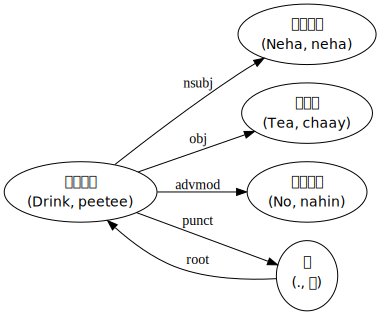

In [9]:
import sagas
sagas.dia('hi').ana('नेहा चाय नहीं पीती।')